In [3]:
import csv
import pandas as pd
from collections import Counter

movie_metadata = pd.read_csv('C:/Users/Admin/Desktop/DATA/Data Engineer/Courses/Simplon/Cours/movie_metadata.csv')

In [4]:
#print(movie_metadata.info())

#print(movie_metadata.head(5))

#print(f"La table products possede {movie_metadata.duplicated().sum()} doublons")

movie_metadatav1 = movie_metadata.drop_duplicates()

print(movie_metadatav1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4979 non-null   object 
 1   director_name              4895 non-null   object 
 2   num_critic_for_reviews     4949 non-null   float64
 3   duration                   4983 non-null   float64
 4   director_facebook_likes    4895 non-null   float64
 5   actor_3_facebook_likes     4975 non-null   float64
 6   actor_2_name               4985 non-null   object 
 7   actor_1_facebook_likes     4991 non-null   float64
 8   gross                      4124 non-null   float64
 9   genres                     4998 non-null   object 
 10  actor_1_name               4991 non-null   object 
 11  movie_title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

In [5]:
movie_metadata_title_genre = movie_metadatav1[['movie_title', 'genres']]

#print(movie_metadata_title_genre.info())

In [6]:
movie_metadata_title_genre_grouped = movie_metadata_title_genre.groupby(['genres']).count()

#print(movie_metadata_title_genre_grouped.info())

In [7]:
movie_metadata_t_g_g_b = movie_metadatav1[['movie_title', 'genres','budget' ,'gross']]

#print(movie_metadata_t_g_g_b.info())

In [8]:
movie_metadata_t_g_g_bv1 = movie_metadata_t_g_g_b.dropna()

movie_metadata_t_g_g_bv1.loc[:,"rentabilite"] = movie_metadata_t_g_g_bv1.loc[:,"gross"] - movie_metadata_t_g_g_bv1.loc[:,"budget"]

#print(movie_metadata_t_g_g_bv1.info())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [9]:
movie_metadata_t_g_g_bv1_grouped = movie_metadata_t_g_g_bv1.groupby(['genres']).sum()

print(movie_metadata_t_g_g_bv1_grouped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, Action to Western
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       762 non-null    float64
 1   gross        762 non-null    float64
 2   rentabilite  762 non-null    float64
dtypes: float64(3)
memory usage: 23.8+ KB
None


### Nombres de films par genre

In [10]:
#print(movie_metadata.info())

#print(movie_metadata.head(5))

#print(f"La table products possede {movie_metadata.duplicated().sum()} doublons")

movie_metadatav1 = movie_metadata.drop_duplicates()

#print(movie_metadatav1.info())

genres = movie_metadatav1['genres'].str.get_dummies('|')

#print(genres.info())

In [11]:
data={}
for genre in genres.columns:
    data[genre]=genres[genre].sum()
    Genre = pd.DataFrame(list(data.items()))

Genre.rename(columns={0:'Genre',1:'Nombre'},inplace=True)
print(Genre)

          Genre  Nombre
0        Action    1143
1     Adventure     914
2     Animation     242
3     Biography     292
4        Comedy    1862
5         Crime     883
6   Documentary     121
7         Drama    2571
8        Family     544
9       Fantasy     604
10    Film-Noir       6
11    Game-Show       1
12      History     205
13       Horror     556
14        Music     212
15      Musical     132
16      Mystery     493
17         News       3
18   Reality-TV       2
19      Romance    1098
20       Sci-Fi     611
21        Short       5
22        Sport     181
23     Thriller    1396
24          War     211
25      Western      94


In [12]:
Genres_sorted = Genre.sort_values(by='Nombre', ascending=False)
#print(Genres_sorted)

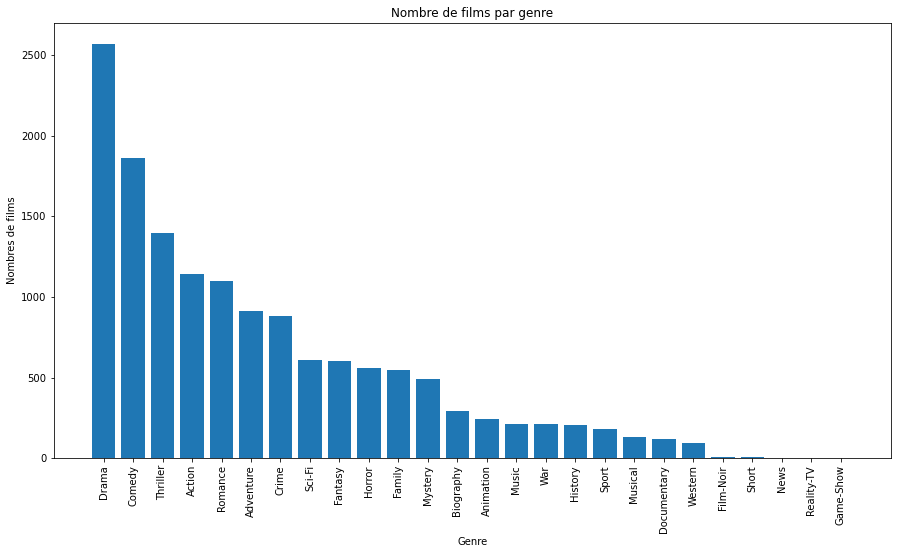

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(Genres_sorted['Genre'],Genres_sorted['Nombre'])
plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.ylabel("Nombres de films")
plt.title("Nombre de films par genre")
plt.show()

### Budget et rentabilité par genre

In [14]:
movie_metadata_g_b = movie_metadatav1[['genres','budget','gross']].dropna()

movie_metadata_g_bv1 = movie_metadata_g_b[['genres','budget']]

movie_metadata_g_b_gv1_grouped = movie_metadata_g_bv1.groupby(['genres'],as_index=False).sum()

print(movie_metadata_g_b_gv1_grouped.head(5))

                                              genres       budget
0                                             Action  553000000.0
1                                   Action|Adventure  591500000.0
2  Action|Adventure|Animation|Comedy|Crime|Family...   70000000.0
3  Action|Adventure|Animation|Comedy|Drama|Family...  235000000.0
4           Action|Adventure|Animation|Comedy|Family  665000000.0


In [15]:
Nombre_sous_genre = []
for ligne in movie_metadata_g_b_gv1_grouped.genres:
    ligne = ligne.split("|")
    Nombre_sous_genre.append(len(ligne))

movie_metadata_g_b_gv1_grouped['Nombre_sous_genre'] = Nombre_sous_genre

budget_dummies = movie_metadata_g_b_gv1_grouped['genres'].str.get_dummies('|').mul( (movie_metadata_g_b_gv1_grouped.budget)/(movie_metadata_g_b_gv1_grouped.Nombre_sous_genre),0)

budget={}
for genre in budget_dummies.columns:
    budget[genre]=budget_dummies[genre].sum()
    Budget = pd.DataFrame(list(budget.items()))

Budget.rename(columns={0:'Genre',1:'Budget'},inplace=True)
print(Budget)

          Genre        Budget
0        Action  1.984082e+10
1     Adventure  1.827269e+10
2     Animation  4.824759e+09
3     Biography  1.991668e+09
4        Comedy  2.086285e+10
5         Crime  8.938104e+09
6   Documentary  3.104530e+08
7         Drama  2.633920e+10
8        Family  7.492869e+09
9       Fantasy  9.700760e+09
10    Film-Noir  4.600000e+05
11      History  1.783052e+09
12       Horror  5.965225e+09
13        Music  1.052790e+09
14      Musical  1.158767e+09
15      Mystery  3.809046e+09
16      Romance  9.773133e+09
17       Sci-Fi  1.308592e+10
18        Short  2.006800e+06
19        Sport  1.540300e+09
20     Thriller  1.407139e+10
21          War  2.824079e+09
22      Western  7.033588e+08


In [16]:
movie_metadata_g_gv1 = movie_metadata_g_b[['genres','gross']]

movie_metadata_g_gv1_grouped = movie_metadata_g_gv1.groupby(['genres'],as_index=False).sum()

movie_metadata_g_gv1_grouped['Nombre_sous_genre'] = Nombre_sous_genre

gross_dummies = movie_metadata_g_gv1_grouped['genres'].str.get_dummies('|').mul( (movie_metadata_g_gv1_grouped.gross)/(movie_metadata_g_gv1_grouped.Nombre_sous_genre),0)

gross={}
for genre in gross_dummies.columns:
    gross[genre]=gross_dummies[genre].sum()
    Gross = pd.DataFrame(list(gross.items()))

Gross.rename(columns={0:'Genre',1:'Gross'},inplace=True)
print(Gross)

          Genre         Gross
0        Action  2.169038e+10
1     Adventure  2.143721e+10
2     Animation  4.553031e+09
3     Biography  2.666062e+09
4        Comedy  2.823019e+10
5         Crime  8.621603e+09
6   Documentary  4.596064e+08
7         Drama  2.514888e+10
8        Family  1.026913e+10
9       Fantasy  1.177645e+10
10    Film-Noir  1.585400e+03
11      History  1.474093e+09
12       Horror  5.696490e+09
13        Music  1.813992e+09
14      Musical  1.298649e+09
15      Mystery  5.219156e+09
16      Romance  1.294522e+10
17       Sci-Fi  1.175412e+10
18        Short  2.573024e+06
19        Sport  2.236838e+09
20     Thriller  1.643266e+10
21          War  1.815898e+09
22      Western  8.278087e+08


In [17]:
Gross.rename(columns={0:'Genre',1:'Gross'},inplace=True)

movie_metadata_b_g = Budget.merge(Gross,on='Genre')

movie_metadata_b_g['rentabilite'] = movie_metadata_b_g['Gross'] - movie_metadata_b_g['Budget']

print(movie_metadata_b_g)

          Genre        Budget         Gross   rentabilite
0        Action  1.984082e+10  2.169038e+10  1.849555e+09
1     Adventure  1.827269e+10  2.143721e+10  3.164525e+09
2     Animation  4.824759e+09  4.553031e+09 -2.717284e+08
3     Biography  1.991668e+09  2.666062e+09  6.743938e+08
4        Comedy  2.086285e+10  2.823019e+10  7.367340e+09
5         Crime  8.938104e+09  8.621603e+09 -3.165010e+08
6   Documentary  3.104530e+08  4.596064e+08  1.491534e+08
7         Drama  2.633920e+10  2.514888e+10 -1.190323e+09
8        Family  7.492869e+09  1.026913e+10  2.776263e+09
9       Fantasy  9.700760e+09  1.177645e+10  2.075688e+09
10    Film-Noir  4.600000e+05  1.585400e+03 -4.584146e+05
11      History  1.783052e+09  1.474093e+09 -3.089596e+08
12       Horror  5.965225e+09  5.696490e+09 -2.687351e+08
13        Music  1.052790e+09  1.813992e+09  7.612014e+08
14      Musical  1.158767e+09  1.298649e+09  1.398821e+08
15      Mystery  3.809046e+09  5.219156e+09  1.410110e+09
16      Romanc

In [18]:
movie_metadata_b_g_sorted = movie_metadata_b_g.sort_values(by='Budget', ascending=False)
print(movie_metadata_b_g_sorted)

          Genre        Budget         Gross   rentabilite
7         Drama  2.633920e+10  2.514888e+10 -1.190323e+09
4        Comedy  2.086285e+10  2.823019e+10  7.367340e+09
0        Action  1.984082e+10  2.169038e+10  1.849555e+09
1     Adventure  1.827269e+10  2.143721e+10  3.164525e+09
20     Thriller  1.407139e+10  1.643266e+10  2.361277e+09
17       Sci-Fi  1.308592e+10  1.175412e+10 -1.331793e+09
16      Romance  9.773133e+09  1.294522e+10  3.172091e+09
9       Fantasy  9.700760e+09  1.177645e+10  2.075688e+09
5         Crime  8.938104e+09  8.621603e+09 -3.165010e+08
8        Family  7.492869e+09  1.026913e+10  2.776263e+09
12       Horror  5.965225e+09  5.696490e+09 -2.687351e+08
2     Animation  4.824759e+09  4.553031e+09 -2.717284e+08
15      Mystery  3.809046e+09  5.219156e+09  1.410110e+09
21          War  2.824079e+09  1.815898e+09 -1.008181e+09
3     Biography  1.991668e+09  2.666062e+09  6.743938e+08
11      History  1.783052e+09  1.474093e+09 -3.089596e+08
19        Spor

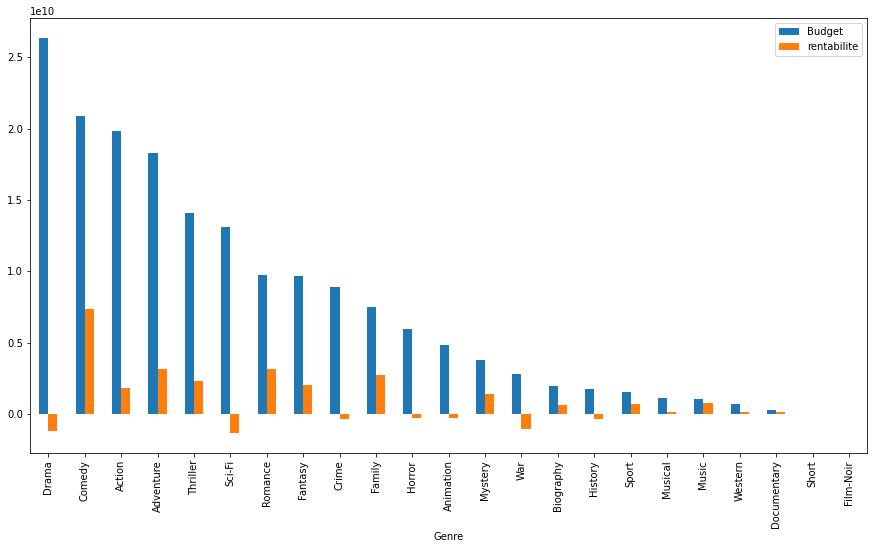

In [19]:
plt.rcParams["figure.figsize"] = (15, 8)
ax = movie_metadata_b_g_sorted.plot.bar(x = 'Genre', y = ['Budget', 'rentabilite'])

### Analyse des mots clés

In [20]:
from collections import Counter
movie_metadatav1_keywordsv = movie_metadatav1['plot_keywords'].dropna().values

Keywords = []
for row in movie_metadatav1_keywordsv:
    row1 = str(row).split('|')
    for word in row1:
        Keywords.append(word)
        
word_occurence = Counter(Keywords)

word_sorted = sorted(word_occurence.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
# Possibilite de creer un dataframe pour les manipulations
word_sorted = pd.DataFrame(word_sorted)
word_sorted.rename(columns = {0:'tag', 1:'count'}, inplace = True)
print(word_sorted[:10])

             tag  count
0           love    194
1         friend    165
2         murder    159
3          death    132
4         police    126
5  new york city     91
6    high school     89
7          alien     82
8         school     73
9            boy     72


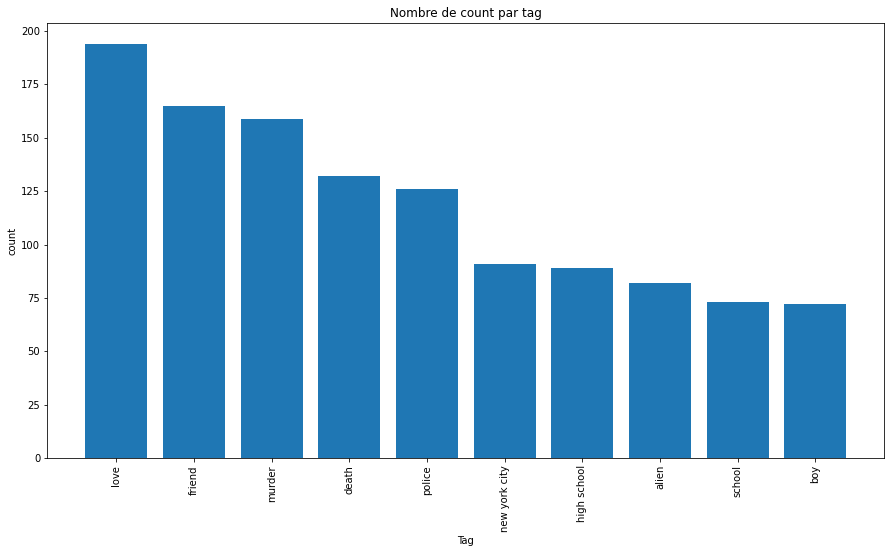

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(word_sorted[:10]['tag'],word_sorted[:10]['count'])
plt.xlabel("Tag")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Nombre de count par tag")
plt.show()

### Analyse des mots clés par genre

In [22]:
movie_metadata_g_k=movie_metadatav1[['genres', 'plot_keywords']]
movie_metadata_g_k=movie_metadata_g_k.dropna()

#On modifie le format des cellules pour plus de lisibilité et de facilité d'exploitation
movie_metadata_g_k=movie_metadata_g_k.applymap(lambda x: str(x).split('|'))
movie_metadata_g_k

,genres,plot_keywords
0,"[Action, Adventure, Fantasy, Sci-Fi]","[avatar, future, marine, native, paraplegic]"
1,"[Action, Adventure, Fantasy]","[goddess, marriage ceremony, marriage proposal..."
2,"[Action, Adventure, Thriller]","[bomb, espionage, sequel, spy, terrorist]"
3,"[Action, Thriller]","[deception, imprisonment, lawlessness, police ..."
5,"[Action, Adventure, Sci-Fi]","[alien, american civil war, male nipple, mars,..."
...,...,...
5036,"[Crime, Drama]","[jewell, mongol, nostradamus, stepnicka, vallone]"
5037,"[Comedy, Drama]",[written and directed by cast member]
5038,"[Comedy, Drama]","[fraud, postal worker, prison, theft, trial]"
5039,"[Crime, Drama, Mystery, Thriller]","[cult, fbi, hideout, prison escape, serial kil..."


In [23]:
#On convertit les valeurs de chaque ligne dans des listes dédiées
list_movie_metadata_g_k=movie_metadata_g_k.values.tolist()

#Chaque ligne est converti en dictionnaire avec son index d'origine
#Pour chaque observation, on lui associe une liste de clés/valeurs genre/tags
dico_movie_metadata_g_k={}
i=0
for x in list_movie_metadata_g_k:
    dico_rows=[]
    for y in x[0]:
        dico_rows.append(dict({y:x[1]}))
    dico_movie_metadata_g_k[i]=dico_rows
    i+=1

#On facilite la lisibilité en transformant la liste de dict en un unique dict pour chaque observation
for a,b in dico_movie_metadata_g_k.items():
    dico_movie_metadata_g_k[a]={k: v for x in b for k, v in x.items()}

#On supprime la clé du dictionnaire qui correspondait à l'indice de l'observation car inutile désormais
temp=[v for k,v in dico_movie_metadata_g_k.items()]
temp

[{'Action': ['avatar', 'future', 'marine', 'native', 'paraplegic'],
  'Adventure': ['avatar', 'future', 'marine', 'native', 'paraplegic'],
  'Fantasy': ['avatar', 'future', 'marine', 'native', 'paraplegic'],
  'Sci-Fi': ['avatar', 'future', 'marine', 'native', 'paraplegic']},
 {'Action': ['goddess',
   'marriage ceremony',
   'marriage proposal',
   'pirate',
   'singapore'],
  'Adventure': ['goddess',
   'marriage ceremony',
   'marriage proposal',
   'pirate',
   'singapore'],
  'Fantasy': ['goddess',
   'marriage ceremony',
   'marriage proposal',
   'pirate',
   'singapore']},
 {'Action': ['bomb', 'espionage', 'sequel', 'spy', 'terrorist'],
  'Adventure': ['bomb', 'espionage', 'sequel', 'spy', 'terrorist'],
  'Thriller': ['bomb', 'espionage', 'sequel', 'spy', 'terrorist']},
 {'Action': ['deception',
   'imprisonment',
   'lawlessness',
   'police officer',
   'terrorist plot'],
  'Thriller': ['deception',
   'imprisonment',
   'lawlessness',
   'police officer',
   'terrorist plot'

In [24]:
#On cré un defaultdict où on va "agréger" les listes de tags selon les genres
from collections import defaultdict
dd=defaultdict(list)
for x in temp:
    for key, value in x.items():
        dd[key].append(value)
        
#On utilise la librairie itertools pour concaténer toutes les listes entrées en valeur de dictionnaire     
import itertools
for k,v in dd.items():
    dd[k]=list(itertools.chain.from_iterable(v))
dd

defaultdict(list,
            {'Action': ['avatar',
              'future',
              'marine',
              'native',
              'paraplegic',
              'goddess',
              'marriage ceremony',
              'marriage proposal',
              'pirate',
              'singapore',
              'bomb',
              'espionage',
              'sequel',
              'spy',
              'terrorist',
              'deception',
              'imprisonment',
              'lawlessness',
              'police officer',
              'terrorist plot',
              'alien',
              'american civil war',
              'male nipple',
              'mars',
              'princess',
              'sandman',
              'spider man',
              'symbiote',
              'venom',
              'villain',
              'artificial intelligence',
              'based on comic book',
              'captain america',
              'marvel cinematic universe',
              

In [25]:
 #On utilise Counter pour faire ressortir les trois tendances les plus élevées par genre
for k,v in dd.items():
    dd[k]=Counter(v).most_common(3)
pd.DataFrame(dd)

,Action,Adventure,Fantasy,Sci-Fi,Thriller,Romance,Animation,Comedy,Family,Musical,...,Horror,War,Biography,Music,Documentary,Game-Show,Reality-TV,News,Short,Film-Noir
0,"(police, 53)","(alien, 37)","(magic, 30)","(alien, 81)","(murder, 106)","(love, 146)","(princess, 12)","(friend, 99)","(dog, 31)","(love, 20)",...,"(death, 34)","(battle, 16)","(love, 17)","(singer, 28)","(interview, 5)","(bachelor, 1)","(bachelor, 1)","(capitalism, 1)","(lesbian, 1)","(murder, 2)"
1,"(murder, 43)","(king, 31)","(vampire, 27)","(future, 42)","(police, 72)","(friend, 66)","(dog, 11)","(love, 88)","(friend, 22)","(singer, 11)",...,"(murder, 32)","(soldier, 15)","(based on true story, 14)","(band, 17)","(new york city, 4)","(seeking love, 1)","(seeking love, 1)","(critique of capitalism, 1)","(paris france, 1)","(law partner, 1)"
2,"(alien, 38)","(island, 27)","(death, 26)","(scientist, 31)","(death, 71)","(marriage, 37)","(friend, 11)","(high school, 51)","(magic, 22)","(dance, 7)",...,"(vampire, 27)","(army, 10)","(singer, 12)","(love, 14)","(three word title, 4)","(single guy, 1)","(single guy, 1)","(investment bank, 1)","(period piece, 1)","(partner, 1)"


### une analyse des notes par genre

In [26]:
movie_metadata_n_g = movie_metadatav1[['genres','imdb_score']].dropna()

movie_metadata_n_g_grouped = movie_metadata_n_g.groupby(['genres'],as_index=False).sum()

Nombre_sous_genre2 = []
for ligne in movie_metadata_n_g_grouped.genres:
    ligne = ligne.split("|")
    Nombre_sous_genre2.append(len(ligne))

movie_metadata_n_g_grouped['Nombre_sous_genre'] = Nombre_sous_genre2

score_dummies = movie_metadata_n_g_grouped['genres'].str.get_dummies('|').mul( (movie_metadata_n_g_grouped.imdb_score)/(movie_metadata_n_g_grouped.Nombre_sous_genre),0)

score={}
for genre in score_dummies.columns:
    score[genre]=score_dummies[genre].sum()
    Score = pd.DataFrame(list(score.items()))

Score.rename(columns={0:'Genre',1:'Score'},inplace=True)
print(Score)

          Genre        Score
0        Action  2115.045714
1     Adventure  1636.766190
2     Animation   366.163214
3     Biography   655.614048
4        Comedy  4847.212500
5         Crime  1827.845000
6   Documentary   570.010000
7         Drama  7132.560714
8        Family   945.509524
9       Fantasy  1082.032738
10    Film-Noir    14.256667
11    Game-Show     0.966667
12      History   418.286905
13       Horror  1379.693452
14        Music   461.365000
15      Musical   234.064881
16      Mystery   950.688333
17         News     8.041667
18   Reality-TV     2.616667
19      Romance  2475.068810
20       Sci-Fi  1129.529405
21        Short    11.186667
22        Sport   418.516667
23     Thriller  2805.434524
24          War   454.969048
25      Western   248.955000


In [27]:
data2={}
for genre in genres.columns:
    data2[genre]=genres[genre].sum()
    Genre2 = pd.DataFrame(list(data.items()))

Genre2.rename(columns={0:'Genre',1:'Nombre'},inplace=True)

movie_metadata_g_s = Score.merge(Genre2,on='Genre')
movie_metadata_g_s['Moyenne'] = movie_metadata_g_s['Score']/movie_metadata_g_s['Nombre']

print(movie_metadata_g_s)

          Genre        Score  Nombre   Moyenne
0        Action  2115.045714    1143  1.850434
1     Adventure  1636.766190     914  1.790773
2     Animation   366.163214     242  1.513071
3     Biography   655.614048     292  2.245254
4        Comedy  4847.212500    1862  2.603229
5         Crime  1827.845000     883  2.070040
6   Documentary   570.010000     121  4.710826
7         Drama  7132.560714    2571  2.774236
8        Family   945.509524     544  1.738069
9       Fantasy  1082.032738     604  1.791445
10    Film-Noir    14.256667       6  2.376111
11    Game-Show     0.966667       1  0.966667
12      History   418.286905     205  2.040424
13       Horror  1379.693452     556  2.481463
14        Music   461.365000     212  2.176250
15      Musical   234.064881     132  1.773219
16      Mystery   950.688333     493  1.928374
17         News     8.041667       3  2.680556
18   Reality-TV     2.616667       2  1.308333
19      Romance  2475.068810    1098  2.254161
20       Sci-

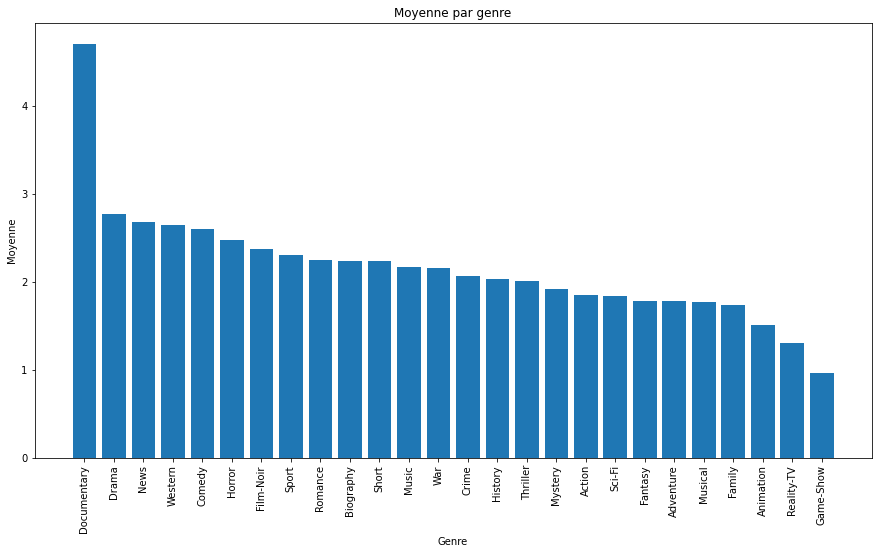

In [28]:
movie_metadata_g_s_sorted = movie_metadata_g_s.sort_values(by='Moyenne', ascending=False)
#print(movie_metadata_g_s_sorted)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(movie_metadata_g_s_sorted['Genre'],movie_metadata_g_s_sorted['Moyenne'])
plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.ylabel("Moyenne")
plt.title("Moyenne par genre")
plt.show()

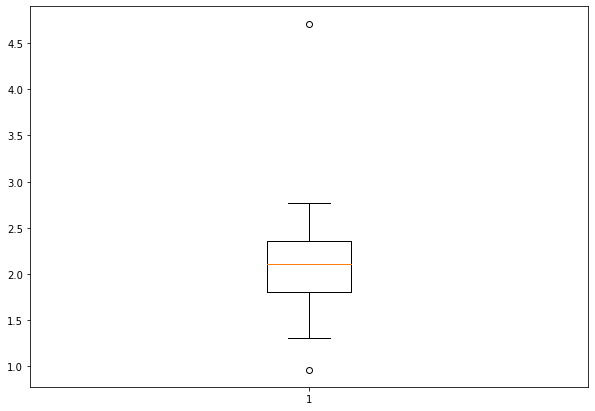

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(movie_metadata_g_s_sorted['Moyenne'])
 
# show plot
plt.show()

### Top 10 des films les plus rentables

In [30]:
df6=movie_metadatav1[['movie_title','director_name','gross','budget']]
df6["rentabilité"]=df6["gross"]-df6["budget"]
df6.sort_values(by='rentabilité', ascending=False).head(10)

C:\Users\Admin\AppData\Local\Temp/ipykernel_19148/3544782611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["rentabilité"]=df6["gross"]-df6["budget"]


,movie_title,director_name,gross,budget,rentabilité
0,Avatar,James Cameron,760505847.0,237000000.0,523505847.0
29,Jurassic World,Colin Trevorrow,652177271.0,150000000.0,502177271.0
26,Titanic,James Cameron,658672302.0,200000000.0,458672302.0
3024,Star Wars: Episode IV - A New Hope,George Lucas,460935665.0,11000000.0,449935665.0
3080,E.T. the Extra-Terrestrial,Steven Spielberg,434949459.0,10500000.0,424449459.0
17,The Avengers,Joss Whedon,623279547.0,220000000.0,403279547.0
509,The Lion King,Roger Allers,422783777.0,45000000.0,377783777.0
240,Star Wars: Episode I - The Phantom Menace,George Lucas,474544677.0,115000000.0,359544677.0
66,The Dark Knight,Christopher Nolan,533316061.0,185000000.0,348316061.0
439,The Hunger Games,Gary Ross,407999255.0,78000000.0,329999255.0


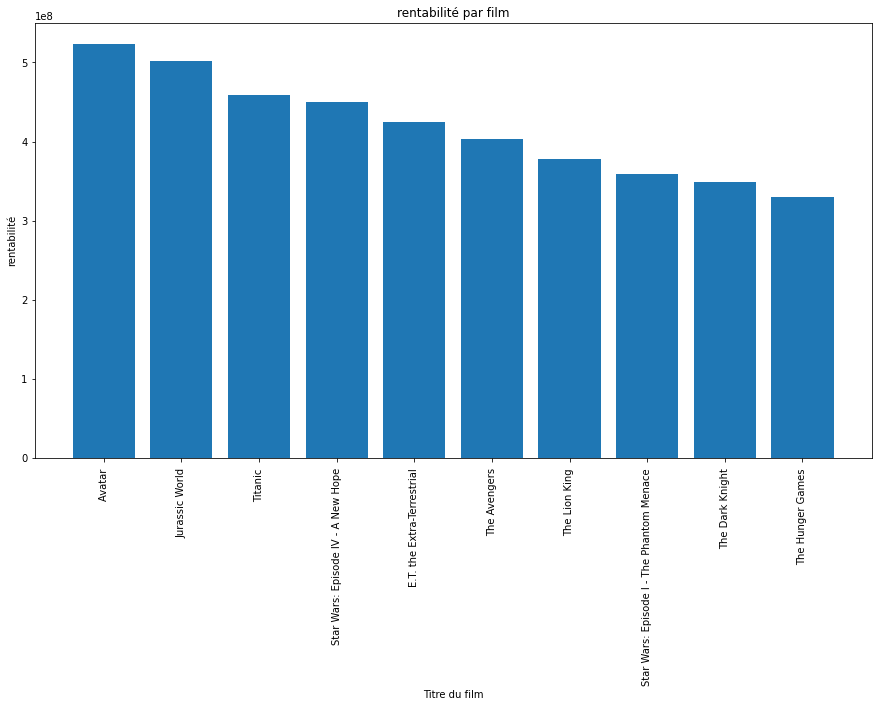

In [31]:
df6b = df6.sort_values(by='rentabilité', ascending=False).head(10)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(df6b['movie_title'],df6b['rentabilité'])
plt.xlabel("Titre du film")
plt.xticks(rotation=90)
plt.ylabel("rentabilité")
plt.title("rentabilité par film")
plt.show()

### Top 10 des films les moins rentables

In [32]:
df6.sort_values(by='rentabilité', ascending=True).head(10)

,movie_title,director_name,gross,budget,rentabilité
2988,The Host,Joon-ho Bong,2201412.0,1.221550e+10,-1.221330e+10
3859,Lady Vengeance,Chan-wook Park,211667.0,4.200000e+09,-4.199788e+09
3005,Fateless,Lajos Koltai,195888.0,2.500000e+09,-2.499804e+09
2323,Princess Mononoke,Hayao Miyazaki,2298191.0,2.400000e+09,-2.397702e+09
2334,Steamboy,Katsuhiro Ôtomo,410388.0,2.127520e+09,-2.127110e+09
3423,Akira,Katsuhiro Ôtomo,439162.0,1.100000e+09,-1.099561e+09
4542,Godzilla 2000,Takao Okawara,10037390.0,1.000000e+09,-9.899626e+08
3851,Tango,Carlos Saura,1687311.0,7.000000e+08,-6.983127e+08
3075,Kabhi Alvida Naa Kehna,Karan Johar,3275443.0,7.000000e+08,-6.967246e+08
3273,Kites,Anurag Basu,1602466.0,6.000000e+08,-5.983975e+08


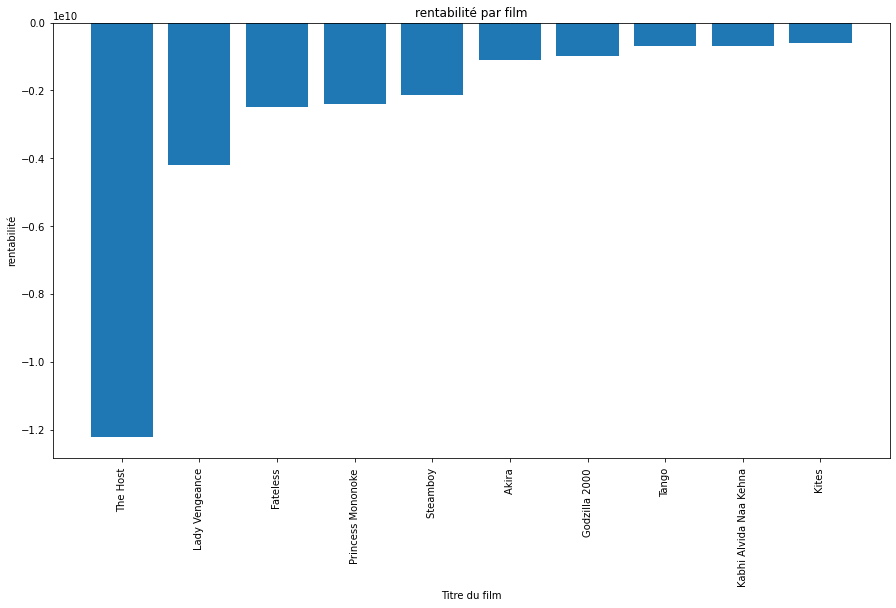

In [33]:
df6c = df6.sort_values(by='rentabilité', ascending=True).head(10)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(df6c['movie_title'],df6c['rentabilité'])
plt.xlabel("Titre du film")
plt.xticks(rotation=90)
plt.ylabel("rentabilité")
plt.title("rentabilité par film")
plt.show()

### Les realisateurs les plus prolifiques 

In [34]:
df6.groupby('director_name')['movie_title'].count().sort_values(ascending=False).head(10)

director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Tim Burton           16
Spike Lee            16
Steven Soderbergh    16
Renny Harlin         15
Oliver Stone         14
Name: movie_title, dtype: int64

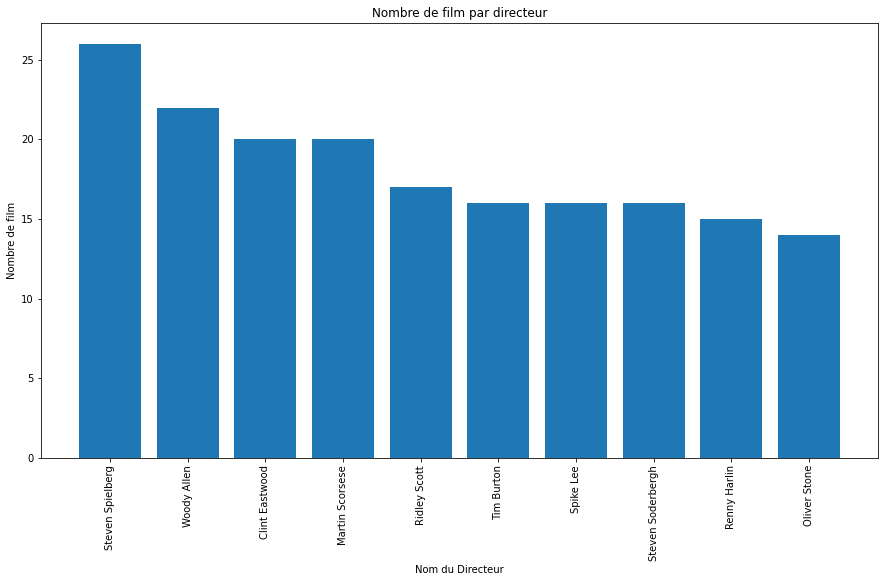

In [35]:
df6d = pd.DataFrame(df6.groupby('director_name')['movie_title'].count().sort_values(ascending=False).head(10))
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(df6d.index,df6d['movie_title'])
plt.xlabel("Nom du Directeur")
plt.xticks(rotation=90)
plt.ylabel("Nombre de film")
plt.title("Nombre de film par directeur")
plt.show()

###  Analyse des notes par producteur

In [36]:
movie_metadatav1_director = movie_metadatav1[['director_name','imdb_score']].dropna()
movie_metadatav1_director_grouped = movie_metadatav1_director.groupby(['director_name'],as_index=False).mean()
print(movie_metadatav1_director_grouped)

           director_name  imdb_score
0          A. Raven Cruz         1.9
1             Aaron Hann         6.0
2        Aaron Schneider         7.1
3          Aaron Seltzer         2.7
4           Abel Ferrara         6.6
...                  ...         ...
2393       Zoran Lisinac         7.1
2394  Álex de la Iglesia         6.1
2395    Émile Gaudreault         6.7
2396        Éric Tessier         6.6
2397       Étienne Faure         4.3

[2398 rows x 2 columns]


In [37]:
movie_metadatav1_director_grouped_sorted = movie_metadatav1_director_grouped.sort_values(by='imdb_score', ascending=False)
print(movie_metadatav1_director_grouped_sorted)

           director_name  imdb_score
1084      John Blanchard         9.5
1620    Mitchell Altieri         8.7
2011    Sadyk Sher-Niyaz         8.7
299            Cary Bell         8.7
1606        Mike Mayhall         8.6
...                  ...         ...
773       Georgia Hilton         2.2
2326  Vondie Curtis-Hall         2.1
723    Frédéric Auburtin         2.0
0          A. Raven Cruz         1.9
1352   Lawrence Kasanoff         1.7

[2398 rows x 2 columns]


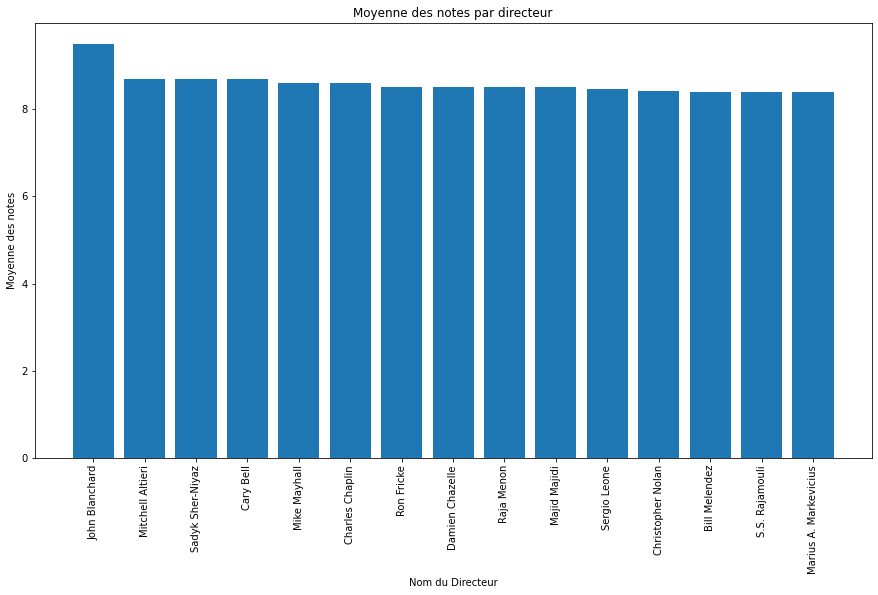

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(movie_metadatav1_director_grouped_sorted[:15]['director_name'],movie_metadatav1_director_grouped_sorted[:15]['imdb_score'])
plt.xlabel("Nom du Directeur")
plt.xticks(rotation=90)
plt.ylabel("Moyenne des notes")
plt.title("Moyenne des notes par directeur")
plt.show()

### Le top 5 des acteurs qui ont joué dans le plus de films

In [39]:
df7=movie_metadatav1[['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','imdb_score','country','plot_keywords']]
a=df7.groupby(['actor_1_name'])['movie_title'].count().sort_values(ascending=False)
b=df7.groupby(['actor_2_name'])['movie_title'].count().sort_values(ascending=False)
c=df7.groupby(['actor_3_name'])['movie_title'].count().sort_values(ascending=False)
frame={'actor_1':a, 'actor_2':b,'actor_3':c}
d=pd.DataFrame(frame).fillna(0)
d['total']=d['actor_1']+d['actor_2']+d['actor_3']
d['total'].sort_values(ascending=False)

Robert De Niro            54.0
Morgan Freeman            47.0
Johnny Depp               40.0
Bruce Willis              40.0
Matt Damon                38.0
                          ... 
CJ Adams                   1.0
Justin Baldoni             1.0
Justin Edward Seale        1.0
Justin Fletcher            1.0
Julie-Marie Parmentier     1.0
Name: total, Length: 6255, dtype: float64

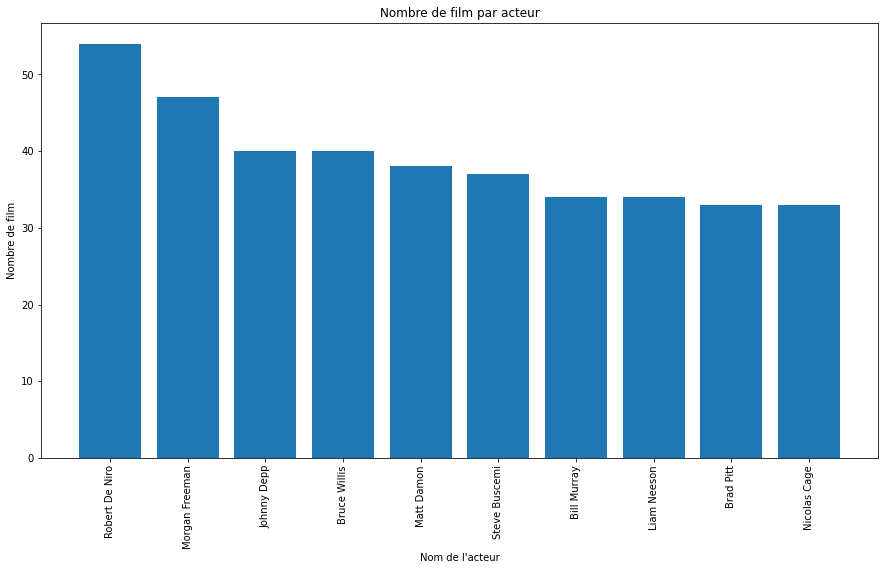

In [40]:
df7b = pd.DataFrame(d['total'].sort_values(ascending=False))
plt.figure(figsize=(15,8))
plt.bar(df7b[:10].index,df7b[:10]['total'])
plt.xlabel("Nom de l'acteur")
plt.xticks(rotation=90)
plt.ylabel("Nombre de film")
plt.title("Nombre de film par acteur")
plt.show()

### le nombre de films avec "love" dans les mots clés

In [41]:
movies_love = movie_metadatav1["plot_keywords"].dropna()
nbre_films_love = 0
liste_love = []
for element in movies_love :
    elem = element.split('|')
    liste_love.append(elem)

for word in liste_love :
    if "love" in word :
        nbre_films_love += 1

print(nbre_films_love)

194


### le nombre de films français ( Langue et Pays = FRANCE )

In [42]:
movie_metadatav1_c_l = movie_metadatav1[['country','language']].dropna()
condition1 = movie_metadatav1['country']=='France'
condition2 = movie_metadatav1['language']=='French'

movie_metadatav1_c_l_french = movie_metadatav1_c_l[condition1 & condition2]
print(len(movie_metadatav1_c_l_french))

65


C:\Users\Admin\AppData\Local\Temp/ipykernel_19148/2183019659.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movie_metadatav1_c_l_french = movie_metadatav1_c_l[condition1 & condition2]


### le directeur avec au moins 10 films qui obtient la meilleure moyenne (note imdb)

In [43]:
plus_de_films=pd.DataFrame(df7.groupby('director_name')['movie_title'].count().sort_values(ascending=False))
mask=list(plus_de_films[plus_de_films['movie_title']>=10].index)
meilleure_moyenne=df7[df7['director_name'].isin(mask)]
meilleure_moyenne.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False)

director_name
David Fincher           7.750000
Peter Jackson           7.675000
Martin Scorsese         7.660000
Steven Spielberg        7.480769
Francis Ford Coppola    7.418182
Richard Linklater       7.327273
Robert Zemeckis         7.307692
Clint Eastwood          7.225000
Ridley Scott            7.070588
Stephen Frears          7.070000
Rob Reiner              7.018182
Woody Allen             7.009091
Oliver Stone            6.950000
Tim Burton              6.931250
Ron Howard              6.930769
Sam Raimi               6.907692
John Carpenter          6.833333
Richard Donner          6.825000
Tony Scott              6.791667
Steven Soderbergh       6.706250
Brian De Palma          6.683333
Chris Columbus          6.654545
Michael Bay             6.638462
John McTiernan          6.630000
Barry Levinson          6.576923
Spike Lee               6.568750
Kevin Smith             6.566667
Joel Schumacher         6.407692
Bobby Farrelly          6.130000
Wes Craven              6.109

### une analyse des facteurs qui jouent le plus sur les notes

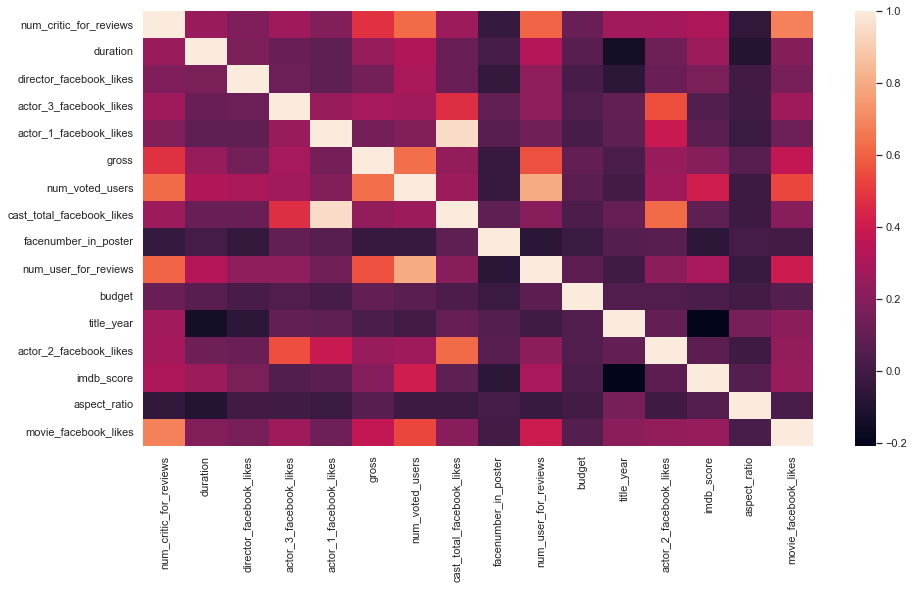

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set()
sns.heatmap(movie_metadatav1.corr())
plt.show()